In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import datetime
import numpy as np

In [29]:
data= pd.read_csv("problem_3_iata_demand_heatmap.csv")

In [70]:
data

,start,IATA,PNRs,week
0,2019-01-03,YYZ,2991,1
1,2019-01-03,CLE,1381,1
2,2019-01-03,CMH,1435,1
3,2019-01-03,PEK,1071,1
4,2019-01-03,SFO,3988,1
...,...,...,...,...
2645,2020-01-02,CHI,5469,1
2646,2020-01-02,LON,6710,1
2647,2020-01-02,HOU,3820,1
2648,2020-01-02,CMH,1231,1


In [83]:
pd.options.display.max_columns=100

In [64]:
data['week']=data['start'].dt.isocalendar().week

In [89]:
datagroup=data.groupby(["week","IATA"])["PNRs"].mean().unstack()

<AxesSubplot:xlabel='IATA', ylabel='week'>

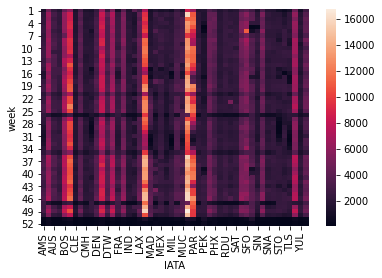

In [91]:
sns.heatmap(datagroup,fig)

In [32]:
data['start'] =data['start'].astype('datetime64[ns]')

In [98]:
fig = go.Figure(data=go.Heatmap(
        z=datagroup.values,
        x=datagroup.index,
        y=datagroup.columns,
        colorscale='Viridis'))

fig.update_layout(
    title='Title',
    xaxis_nticks=36)

fig.show()